# 1. Import dependencies

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Load the data

In [2]:
df = pd.read_csv('creditcard.csv')

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# 3. Exploratory Data Analysis

In [4]:
df.shape

(284807, 31)

In [5]:
# No null values in our dataset
df.isnull().sum() 

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [6]:
# We can see that we have a bunch of annonymised columns, as well as a 'Time', Class', and 'Amount' columns
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [7]:
# Let's get rid of the time column as we won't be using it
df = df.drop('Time', axis=1)
df.shape

(284807, 30)

In [8]:
# We are interested in the 'Class' column which represents whether a transaction was genuine or fraudulent.
# Let's see compare the number of fraudelent transactions vs normal one

print(df.groupby('Class').size())

Class
0    284315
1       492
dtype: int64


[Text(0, 0, 'Normal'), Text(0, 0, 'Fruad')]

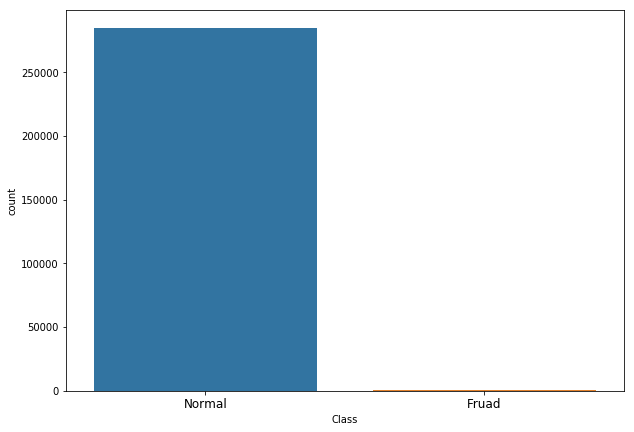

In [9]:
# As we can see we have a highly imbalanced dataset, with the majority of transactions being normal. While less than 
# 500 are fraudulent.

plt.figure(figsize=(10,7))
ax = sns.countplot(df['Class'])
ax.set_xticklabels(['Normal','Fruad'], fontsize=12)

In [10]:
# Let's create two new Dataframes - one for each class

fraud = df[df['Class'] == 1]
normal = df[df['Class'] == 0]

print(fraud.shape)
print(normal.shape)

(492, 30)
(284315, 30)


[Text(0, 0, 'Normal'), Text(0, 0, 'Fruad')]

<Figure size 720x504 with 0 Axes>

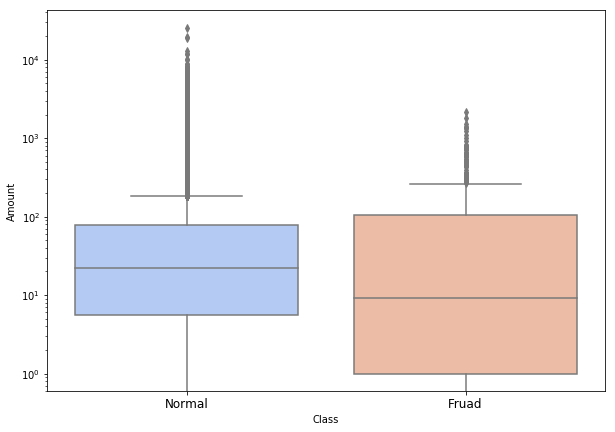

In [11]:
# let's compare amounts spent in both the fraud and normal transactions df
# it seems that the mean amount for normal transactions are slighly higher than fruadelent ones
# moreover, normal transactions have a much larger range than fruadelent transactions
plt.figure(figsize=(10,7))
plt.figure(figsize=(10,7))
ax = sns.boxplot(x="Class", y="Amount", palette='coolwarm', data=df)  # RUN PLOT   
ax.set_yscale('log')
ax.set_xticklabels(['Normal','Fruad'], fontsize=12)

# 4. Data Preparation

In [12]:
# ML Algorithms tend to work better when the data is scaled. So let's start off by standardizing the Amount colum (everything else seems to already be scaled)
df.head()

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

df['Amount'] = scaler.fit_transform(df['Amount'].values.reshape(-1, 1))

In [29]:
# Next, we need to split up the df into a training set and test set. Since we're training an autoencoder to identify
# anamolies within an imbalaced dataset, we'll only be training our model on normal transactions. By doing this,
# our model will learn a compressed representation of what normal transactions look like. Then we can, pass our model new data with
# both fraudelent and normal transactions- and since our model has learned the representation of normal transactions
# it should be able to identify other normal transactions it hasn't seen before since it has learned the representation of normal transactions. 

from sklearn.model_selection import train_test_split

X_train, X_test = train_test_split(df, test_size=0.25, random_state=42)
X_train = X_train[X_train['Class'] == 0] # we have 80% our data as normal transactions
X_train = X_train.drop(['Class'], axis=1)


y_test = X_test['Class']

X_test = X_test.drop(['Class'], axis=1)
X_train = X_train.values
X_test = X_test.values

In [30]:
X_train.shape

(213226, 29)

In [31]:
X_test.shape

(71202, 29)

In [32]:
y_test[y_test == 1].sum() # number of fraudlent cases in the test set

113

# 5. Building and Fitting the Autoencoder

In [33]:
from keras.models import Sequential, Model
from keras import regularizers
from keras.layers import Dense, Input
from keras.callbacks import ModelCheckpoint

Using TensorFlow backend.


In [34]:
model= Sequential()
model.add(Dense(512, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(X_train.shape[1]))
model.compile(optimizer='adam', 
                    loss='mean_squared_error', 
                    metrics=['accuracy'])


In [35]:
model.fit(X_train, X_train,
                    epochs=150,
                    batch_size=64,
                    shuffle=True,
                    validation_data=(X_test, X_test),
                    verbose=1)

Train on 213226 samples, validate on 71202 samples
Epoch 1/150
213226/213226 [==============================] - 16s 74us/step - loss: 0.3334 - accuracy: 0.6099 - val_loss: 0.2787 - val_accuracy: 0.6466
Epoch 2/150
213226/213226 [==============================] - 15s 71us/step - loss: 0.2392 - accuracy: 0.6589 - val_loss: 0.2454 - val_accuracy: 0.6760
Epoch 3/150
213226/213226 [==============================] - 15s 71us/step - loss: 0.2136 - accuracy: 0.6771 - val_loss: 0.2119 - val_accuracy: 0.6901
Epoch 4/150
213226/213226 [==============================] - 16s 76us/step - loss: 0.1957 - accuracy: 0.6904 - val_loss: 0.2350 - val_accuracy: 0.6817
Epoch 5/150
213226/213226 [==============================] - 16s 74us/step - loss: 0.1951 - accuracy: 0.6967 - val_loss: 0.2058 - val_accuracy: 0.6962
Epoch 6/150
213226/213226 [==============================] - 16s 73us/step - loss: 0.1810 - accuracy: 0.7018 - val_loss: 0.1816 - val_accuracy: 0.7000
Epoch 7/150
213226/213226 [================

213226/213226 [==============================] - 16s 73us/step - loss: 0.1286 - accuracy: 0.7558 - val_loss: 0.1394 - val_accuracy: 0.7565
Epoch 55/150
213226/213226 [==============================] - 15s 71us/step - loss: 0.1251 - accuracy: 0.7582 - val_loss: 0.1361 - val_accuracy: 0.7595
Epoch 56/150
213226/213226 [==============================] - 15s 72us/step - loss: 0.1264 - accuracy: 0.7573 - val_loss: 0.1424 - val_accuracy: 0.7510
Epoch 57/150
213226/213226 [==============================] - 15s 71us/step - loss: 0.1256 - accuracy: 0.7590 - val_loss: 0.1353 - val_accuracy: 0.7644
Epoch 58/150
213226/213226 [==============================] - 15s 73us/step - loss: 0.1246 - accuracy: 0.7590 - val_loss: 0.1350 - val_accuracy: 0.7572
Epoch 59/150
213226/213226 [==============================] - 15s 72us/step - loss: 0.1280 - accuracy: 0.7583 - val_loss: 0.1420 - val_accuracy: 0.7562
Epoch 60/150
213226/213226 [==============================] - 15s 72us/step - loss: 0.1291 - accuracy

Epoch 108/150
213226/213226 [==============================] - 15s 71us/step - loss: 0.1245 - accuracy: 0.7571 - val_loss: 0.1735 - val_accuracy: 0.7236
Epoch 109/150
213226/213226 [==============================] - 15s 70us/step - loss: 0.1246 - accuracy: 0.7576 - val_loss: 0.1373 - val_accuracy: 0.7503
Epoch 110/150
213226/213226 [==============================] - 15s 71us/step - loss: 0.1239 - accuracy: 0.7582 - val_loss: 0.1404 - val_accuracy: 0.7497
Epoch 111/150
213226/213226 [==============================] - 15s 71us/step - loss: 0.1212 - accuracy: 0.7603 - val_loss: 0.1310 - val_accuracy: 0.7652
Epoch 112/150
213226/213226 [==============================] - 16s 76us/step - loss: 0.1227 - accuracy: 0.7607 - val_loss: 0.1410 - val_accuracy: 0.7556
Epoch 113/150
213226/213226 [==============================] - 16s 73us/step - loss: 0.1203 - accuracy: 0.7618 - val_loss: 0.1370 - val_accuracy: 0.7574
Epoch 114/150
213226/213226 [==============================] - 16s 75us/step - los

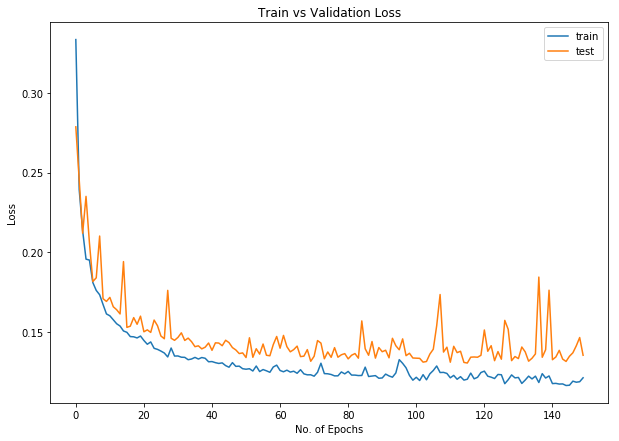

In [36]:
# plotting model loss
plt.figure(figsize=(10,7))
plt.plot(model.history.history['loss'],label='train')
plt.plot(model.history.history['val_loss'], label='test')
plt.title('Train vs Validation Loss')
plt.xlabel('No. of Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# 6. Evaluating Model Performance on Test Data

In [37]:
predictions = model.predict(X_test)

In [38]:
import numpy as np
mse = np.mean(np.power(X_test - predictions, 2), axis=1)

results = pd.DataFrame({'reconstruction_error': mse,
                        'actual_label': y_test})


results.head()

,reconstruction_error,actual_label
43428,9.006584,1
49906,0.216859,0
29474,0.012613,0
276481,0.086773,0
278846,0.003272,0


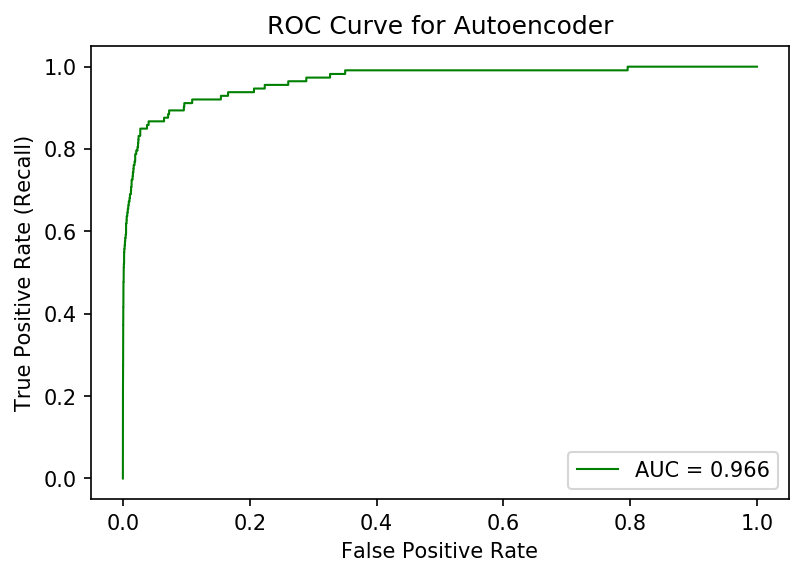

In [39]:
# The reconstruction_error ranges between 0 and 1. The closer the error is to 1 the more confident our model is
# that the transaction was a fraudelent one and vice versa. The threshold we set is up to us. There is a tradeoff however.
# The larger the threshold i.e. closer to 1, the fewer false positives but the greater the false negatives and vice versa.
# One way to figure out where to place is our threshold is by using an ROC curve.


from sklearn.metrics import roc_curve, auc
# get false and true positive rates
fpr, tpr, thresholds = roc_curve(y_test, results['reconstruction_error'])
# get area under the curve
roc_auc = auc(fpr, tpr)
# PLOT ROC curve
plt.figure(dpi=150)
plt.plot(fpr, tpr, lw=1, color='green', label=f'AUC = {roc_auc:.3f}')
plt.title('ROC Curve for Autoencoder')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.legend()
plt.show()

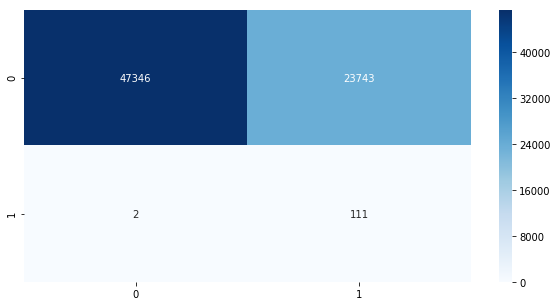

In [40]:
# since we want to be on the top left of the ROC Curve, a threshold of around 0.9 looks good.
results['reconstruction_error'] = results['reconstruction_error'].apply(lambda x : 1 if x>0.09 else 0)

# lets plot a confusin matrix
from sklearn.metrics import confusion_matrix,roc_curve
cf_matrix = confusion_matrix(results['actual_label'], results['reconstruction_error'])

plt.figure(figsize=(10,5))
sns.heatmap(cf_matrix, annot=True,cmap='Blues', fmt='g')


# 7. Calculating accuracy, precision and recall


In [41]:
# Calculating accuracy, precision and recall
# Precision is the ratio tp / (tp + fp)
# Recall is the ratio tp / (tp + fn)
# Accuracy is the ratio of tp + tn / (tp + tn + fp + fn)

tp, fp, fn, tn = cf_matrix.ravel()

precision = tp / (tp + fp) 
recall = tp / (tp + fn) 
accuracy = (tp + tn) / (tp + tn + fp + fn)

print(f'Recall: {round(recall*100)}')
print(f'Precision: {round(precision*100)}')
print(f'Accuracy: {round(accuracy*100)}')

Recall: 100.0
Precision: 67.0
Accuracy: 67.0


# 8. Conclusion

Due to the very low threshold of 0.9, our model does an excellent job at predicting fraudulent cases with a recall of 100%. However, this comes with an opportunity cost of a reduced precision of 67%. Altering the threshold, will lead to differnt outcomes.